# Пакет `pandas`: анализ временных рядов

---

**Источники:**

[Временной ряд](https://ru.wikipedia.org/wiki/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D1%80%D1%8F%D0%B4#:~:text=%D0%BF%D0%BE%20%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D1%83%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B0%3A%20%D0%BC%D0%BE%D0%BC%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5,%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8F%20%D0%B7%D0%B0%20%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4%D1%8B%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%B8.)

[Введение в pandas: анализ данных на Python](https://khashtamov.com/ru/pandas-introduction/)

[Time series / date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.3.3 from /home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
# !conda install pandas matplotlib -y

In [3]:
import pandas as pd

pd.__version__

'1.2.3'

## Что такое временно́й ряд и анализ временны́х рядов?

**Временно́й ряд (или ряд динамики)** — собранный в разные моменты времени статистический материал о значении каких-либо параметров (в простейшем случае одного) исследуемого процесса.

Каждая единица статистического материала называется измерением или отсчётом, также допустимо называть его уровнем на указанный с ним момент времени.

Во временном ряде для каждого отсчёта должно быть указано время измерения или номер измерения по порядку.

**Примеры временных рядов:**
Это могут быть как показатели (характеристики) технических систем, так и показатели природных, социальных, экономических и других систем (например, погодные данные).
Типичным примером временного ряда можно назвать биржевой курс, при анализе которого пытаются определить основное направление развития (тенденцию или тренд).

Временной ряд существенно отличается от простой выборки данных, так как **при анализе учитывается взаимосвязь измерений со временем**, а не только статистическое разнообразие и статистические характеристики выборки.


**Анализ временны́х рядов** — совокупность математико-статистических методов анализа, предназначенных для выявления структуры временных рядов и для их прогнозирования.

Выявление структуры временного ряда необходимо для того, чтобы построить математическую модель того явления, которое является источником анализируемого временного ряда. Прогноз будущих значений временного ряда используется для эффективного принятия решений.

**Временные ряды** состоят из двух элементов:
- периода времени, за который приводятся числовые значения;
- числовых значений того или иного показателя, называемых уровнями ряда.

<img src="images/time_series_example.png"/>

## Анализ временных рядов с помощью `pandas`

Используются [данные о ценах на акции Apple 2010-2017](https://www.kaggle.com/fayomi/apple-stock-prices-from-20102017)

In [4]:
# загрузить датасет в pandas dataframe
# при загрузке указать колонку Date как индекс
# загрузить даты как даты (а не как object)
df = pd.read_csv('./../../data/apple.csv', 
                 index_col='Date', 
                 parse_dates=True)

# вывести первые 5 и последние 5 строк
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.5000,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
2010-01-05,214.60,215.5900,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2010-01-06,214.38,215.2300,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
2010-01-07,211.75,212.0000,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
2010-01-08,210.30,212.0000,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,115.59,116.5200,115.59,116.52,14249484.0,0.0,1.0,114.162295,115.080808,114.162295,115.080808,14249484.0
2016-12-27,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,115.811668,18296855.0
2016-12-28,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,115.317843,20905892.0


Таким образом получили `DataFrame` с `DatetimeIndex` по колонке `Date`.

Отсортируем новый индекс в правильном порядке для работы с выборками.

Если колонка имеет формат даты и времени отличный от `ISO8601`, то для правильного перевода строки в нужный тип, можно использовать метод `pandas.to_datetime`.

In [5]:
# вывести тип индекса
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
# отсортировать по индексу
df = df.sort_index()

df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.5000,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
2010-01-05,214.60,215.5900,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2010-01-06,214.38,215.2300,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
2010-01-07,211.75,212.0000,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
2010-01-08,210.30,212.0000,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,115.59,116.5200,115.59,116.52,14249484.0,0.0,1.0,114.162295,115.080808,114.162295,115.080808,14249484.0
2016-12-27,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,115.811668,18296855.0
2016-12-28,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,115.317843,20905892.0


In [7]:
# основная информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1762 non-null   float64
 1   High         1762 non-null   float64
 2   Low          1762 non-null   float64
 3   Close        1762 non-null   float64
 4   Volume       1762 non-null   float64
 5   Ex-Dividend  1762 non-null   float64
 6   Split Ratio  1762 non-null   float64
 7   Adj. Open    1762 non-null   float64
 8   Adj. High    1762 non-null   float64
 9   Adj. Low     1762 non-null   float64
 10  Adj. Close   1762 non-null   float64
 11  Adj. Volume  1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


In [8]:
# основные значения описательной статистики
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,313.074500,315.910814,309.824105,312.926818,2.819498e+07,0.016254,1.003405,74.418319,75.086539,73.684675,74.396986,9.422467e+07
std,185.301563,186.898629,183.374468,185.147360,2.006877e+07,0.201295,0.142938,28.346796,28.572294,28.120892,28.343637,6.020590e+07
min,90.000000,90.700000,89.470000,90.280000,5.624800e+06,0.000000,1.000000,24.722226,25.188732,24.449777,24.681102,1.147592e+07
25%,115.222500,116.362500,114.002500,115.190000,1.379790e+07,0.000000,1.000000,49.846058,50.295857,49.183248,49.882685,4.915603e+07
50%,318.230000,320.600000,316.545000,318.240000,2.177095e+07,0.000000,1.000000,72.471613,73.063212,71.707141,72.398461,8.050385e+07
75%,470.880000,478.110000,467.973500,472.592500,3.700019e+07,0.000000,1.000000,99.277854,99.942148,98.580770,99.401332,1.210816e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,128.233349,128.314416,125.839962,126.931724,4.702495e+08


In [9]:
# средняя цена акции (mean) при закрытии (Close) на период дат
df.loc['2012-Feb', 'Close'].mean()

497.5710000000001

In [10]:
# средняя цена акции (mean) на закрытии (Close) в промежутке дат
df.loc['2012-Feb':'2015-Feb', 'Close'].mean()

431.542362742561

<AxesSubplot:>

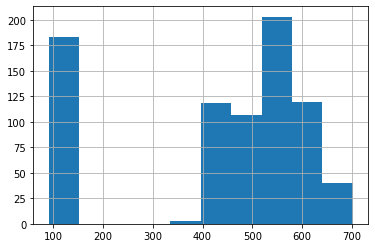

In [11]:
# гистограмма
df.loc['2012-Feb':'2015-Feb', 'Close'].hist()

<AxesSubplot:ylabel='Density'>

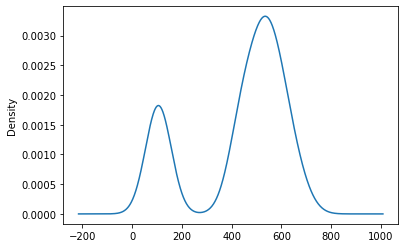

In [12]:
# ядерная оценка плотности
df.loc['2012-Feb':'2015-Feb', 'Close'].plot.kde()

### Метод `resample`

Удобный метод преобразования частоты и передискретизации временных рядов.

Объект должен иметь индекс, подобный `datetime` (`DatetimeIndex`, `PeriodIndex` или `TimedeltaIndex`), или передавать значения, подобные `datetime`, в ключевое слово `on` (столбец, который следует использовать вместо индекса для повторной выборки) или `level` (при использовании `MultiIndex`, уровень используемый для повторной выборки).

Resampling мощный инструмент при работе с временными рядами (`time series`), помогающий переформировать выборку так, как удобно.

Дополнительную информацию можно посмотреть в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

<AxesSubplot:xlabel='Date'>

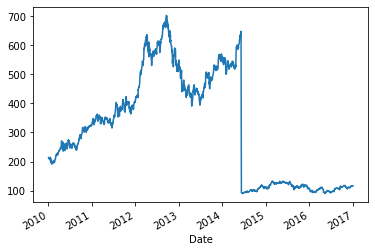

In [13]:
# линейный график для цен акции при закрытии
df.Close.plot()

<AxesSubplot:xlabel='Date'>

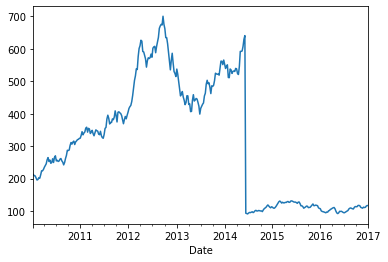

In [14]:
# средняя цена акции (mean) на закрытии (Close) по неделям
close_w_mean = df.resample('W')['Close'].mean()

# линейный график
close_w_mean.plot()

<AxesSubplot:xlabel='Date'>

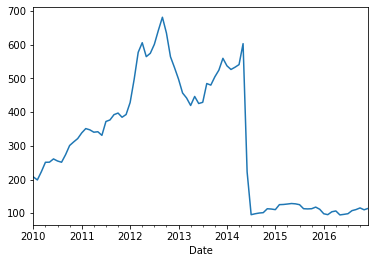

In [15]:
# средняя цена акции (mean) на закрытии (Close) по месяцам
close_m_mean = df.resample('M')['Close'].mean()

# линейный график
close_m_mean.plot()